<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


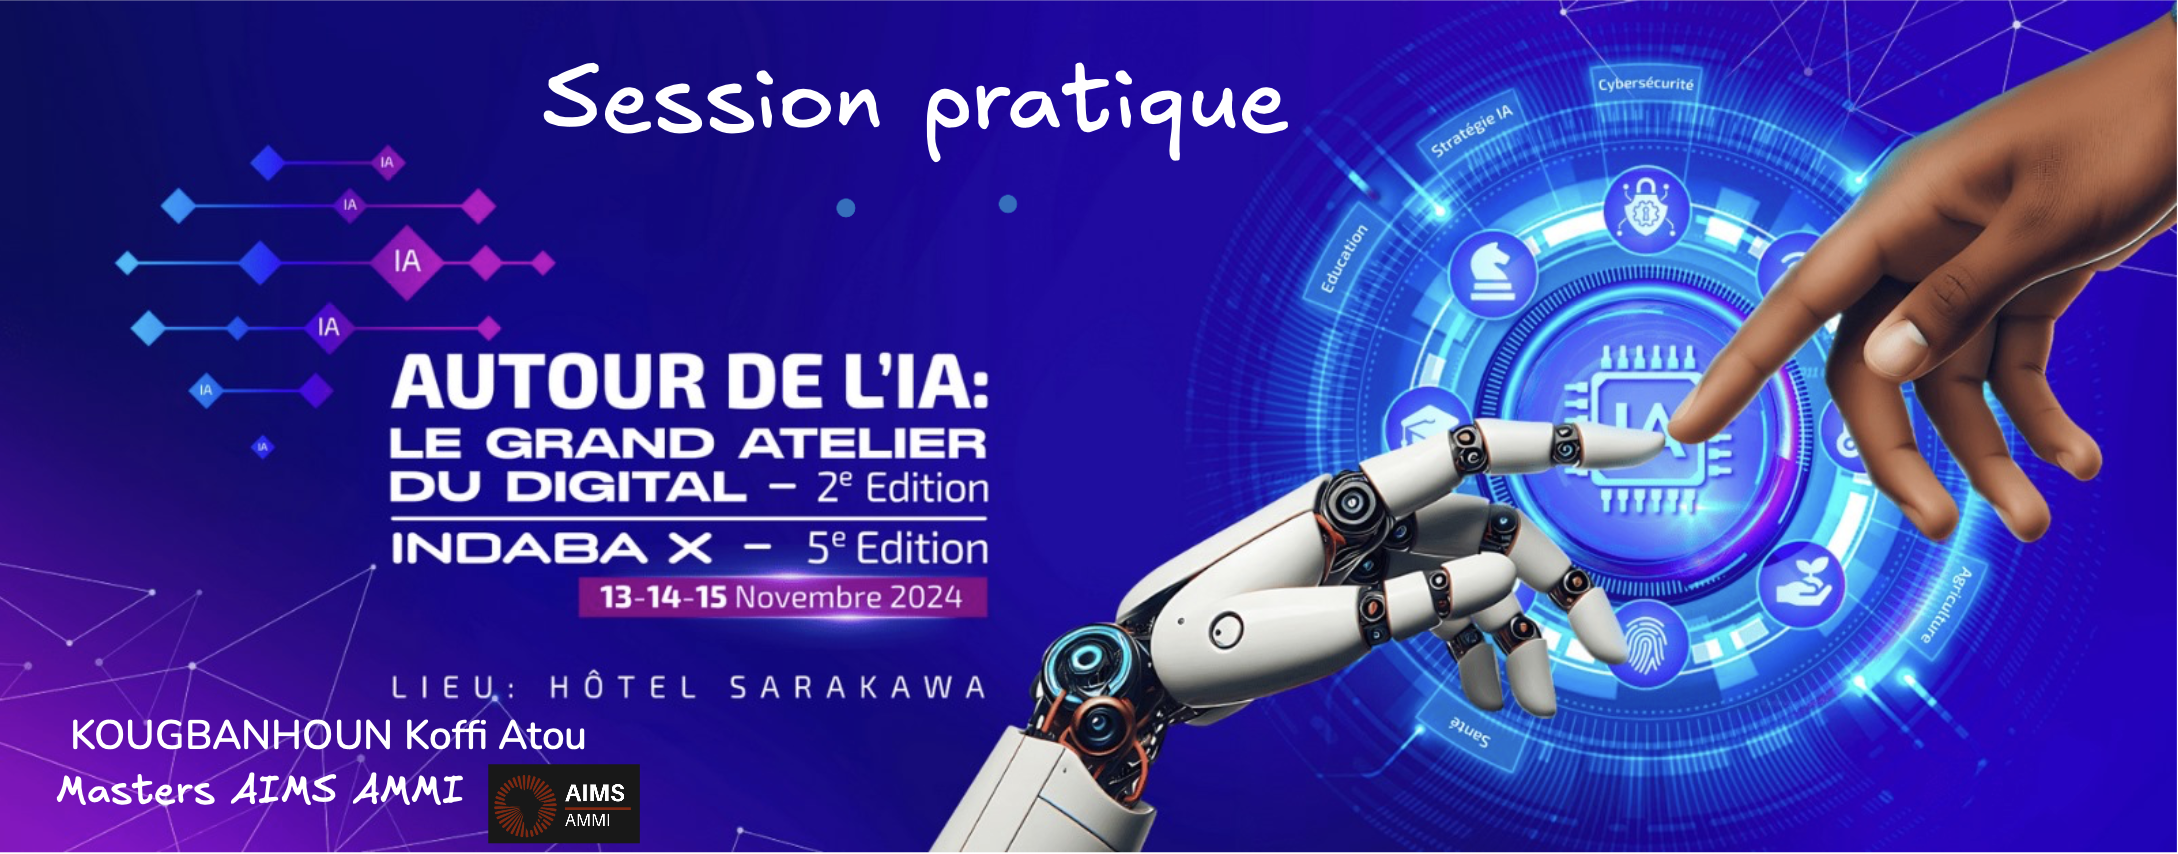

# 00. Les Fondamentaux de PyTorch

## Qu'est-ce que PyTorch ?

[PyTorch](https://pytorch.org/) est une plateforme open source de machine learning et de deep learning.

## À quoi sert PyTorch ?

PyTorch permet de manipuler et de traiter des données, ainsi que d’écrire des algorithmes de machine learning en utilisant le langage Python.

## Qui utilise PyTorch ?

De nombreuses grandes entreprises technologiques, telles que [Meta (Facebook)](https://ai.facebook.com/blog/pytorch-builds-the-future-of-ai-and-machine-learning-at-facebook/), Tesla et Microsoft, ainsi que des entreprises de recherche en intelligence artificielle, comme [OpenAI](https://openai.com/blog/openai-pytorch/), utilisent PyTorch pour mener des recherches et intégrer le machine learning dans leurs produits.

![pytorch utilisé dans l'industrie et la recherche](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-being-used-across-research-and-industry.png)

Par exemple, Andrej Karpathy (responsable de l'IA chez Tesla) a donné plusieurs conférences ([PyTorch DevCon 2019](https://youtu.be/oBklltKXtDE), [Tesla AI Day 2021](https://youtu.be/j0z4FweCy4M?t=2904)) sur l'utilisation de PyTorch chez Tesla pour alimenter leurs modèles de vision par ordinateur de conduite autonome.

PyTorch est également utilisé dans d'autres secteurs comme l'agriculture pour [alimenter la vision par ordinateur sur les tracteurs](https://medium.com/pytorch/ai-for-ag-production-machine-learning-for-agriculture-e8cfdb9849a1).

## Pourquoi utiliser PyTorch ?

Les chercheurs en machine learning aiment utiliser PyTorch. Depuis février 2022, PyTorch est le [framework de deep learning le plus utilisé sur Papers With Code](https://paperswithcode.com/trends), un site pour suivre les articles de recherche en machine learning et les dépôts de code associés.

PyTorch s'occupe aussi de nombreux aspects tels que l'accélération GPU (pour exécuter votre code plus rapidement) en arrière-plan.

Ainsi, vous pouvez vous concentrer sur la manipulation des données et l'écriture d'algorithmes, tandis que PyTorch s'assure que tout fonctionne rapidement.

Et si des entreprises comme Tesla et Meta (Facebook) l'utilisent pour créer des modèles déployés dans des centaines d'applications, alimentant des milliers de voitures et livrant du contenu à des milliards de personnes, c'est un choix de développement avéré.

## Ce que nous allons couvrir dans ce module

Cette session pratique est divisée en deux différentes sections (notebooks).

Chaque carnet couvre des idées et des concepts importants de PyTorch.

Les carnets suivants s'appuient sur les connaissances des précédents (la numérotation commence à 00 et  01).

Ce carnet traite du bloc de construction fondamental du machine learning et du deep learning, le tenseur.

Nous allons notamment aborder :

| **Sujet** | **Contenu** |
| ----- | ----- |
| **Introduction aux tenseurs** | Les tenseurs sont les blocs de construction de base du machine learning et du deep learning. |
| **Créer des tenseurs** | Les tenseurs peuvent représenter presque n'importe quel type de données (images, mots, tableaux de nombres). |
| **Extraire des informations des tenseurs** | Si vous pouvez mettre des informations dans un tenseur, vous voudrez aussi les en extraire. |
| **Manipuler les tenseurs** | Les algorithmes de machine learning (comme les réseaux neuronaux) impliquent de nombreuses manipulations de tenseurs : addition, multiplication, combinaison, etc. |
| **Gérer les formes de tenseurs** | Un des problèmes courants en machine learning est de gérer les incompatibilités de formes (essayer de mélanger des tenseurs de formes inappropriées). |
| **Indexer sur des tenseurs** | Si vous avez indexé sur une liste Python ou un tableau NumPy, c'est très similaire avec les tenseurs, mais ceux-ci peuvent avoir bien plus de dimensions. |
| **Mélanger les tenseurs PyTorch et NumPy** | PyTorch travaille avec des tenseurs ([`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html)), NumPy préfère les tableaux ([`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)), parfois vous voudrez combiner ces deux types. |
| **Reproductibilité** | Le machine learning est très expérimental et utilise beaucoup d'*aléatoire*, mais parfois, vous souhaiterez que cette *aléatoire* ne soit pas si aléatoire. |
| **Exécuter des tenseurs sur GPU** | Les GPU (unités de traitement graphique) accélèrent votre code, PyTorch facilite l'exécution de votre code sur GPU. |



## Importer PyTorch

> **Remarque :** Avant d'exécuter le code dans ce carnet, vous devez avoir suivi les [étapes d'installation de PyTorch](https://pytorch.org/get-started/locally/).
>
> Cependant, **si vous utilisez Google Colab**, tout devrait fonctionner (Google Colab est fourni avec PyTorch et d'autres bibliothèques installées).

Commençons par importer PyTorch et vérifier la version que nous utilisons.

In [ ]:
import torch
torch.__version__

'2.5.0+cu121'

Parfait, il semble que nous ayons PyTorch 1.10.0+.

Cela signifie que si vous suivez ce matériel, vous verrez une compatibilité maximale avec PyTorch 1.10.0+. Cependant, si votre version est beaucoup plus récente, vous pourriez remarquer quelques incohérences.

Et si vous rencontrez des problèmes, n'hésitez pas à poster sur la [page de Discussions GitHub du cours](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

## Introduction aux tenseurs

Maintenant que nous avons importé PyTorch, il est temps d'apprendre ce que sont les tenseurs.

Les tenseurs sont le bloc de construction fondamental du machine learning.

Ils ont pour rôle de représenter les données de manière numérique.

Par exemple, vous pourriez représenter une image sous forme de tenseur avec la forme `[3, 224, 224]`, ce qui signifierait `[canaux_couleur, hauteur, largeur]`. Cela veut dire que l'image a `3` canaux de couleur (rouge, vert, bleu), une hauteur de `224` pixels et une largeur de `224` pixels.

![exemple de passage d'une image d'entrée à une représentation tensorielle de l'image, celle-ci est décomposée en 3 canaux de couleur et des nombres pour représenter la hauteur et la largeur](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

En langage de tenseurs (le vocabulaire utilisé pour décrire les tenseurs), ce tenseur aurait trois dimensions : une pour `canaux_couleur`, `hauteur` et `largeur`.

Mais ne précipitons pas les choses.

Apprenons-en davantage sur les tenseurs en les codant.



### Création de tenseurs

PyTorch adore les tenseurs. Tellement qu’il y a une page entière de documentation dédiée à la classe [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html).

Votre premier exercice est de [lire la documentation sur `torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) pendant 10 minutes. Mais vous pouvez le faire plus tard.

Passons au code.

La première chose que nous allons créer est un **scalaire**.

Un scalaire est un nombre unique et, en langage de tenseur, c'est un tenseur de dimension zéro.

> **Remarque :** C’est une tendance de ce cours. Nous allons nous concentrer sur l'écriture de code spécifique. Mais souvent, je vous donnerai des exercices impliquant la lecture et la familiarisation avec la documentation de PyTorch. Car après tout, une fois ce cours terminé, vous voudrez sans doute en apprendre davantage. Et la documentation sera un endroit où vous vous retrouverez souvent.

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

Voyez-vous comment le code ci-dessus a affiché `tensor(7)` ?

Cela signifie que bien que `scalar` soit un nombre unique, il est de type `torch.Tensor`.

Nous pouvons vérifier les dimensions d'un tenseur en utilisant l'attribut `ndim`.

In [ ]:
scalar.ndim

0

Et si nous voulions récupérer le nombre depuis le tenseur ?

Autrement dit, le transformer de `torch.Tensor` en un entier Python ?

Pour cela, nous pouvons utiliser la méthode `item()`.

In [ ]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

D'accord, voyons maintenant un **vecteur**.

Un vecteur est un tenseur à une seule dimension, mais il peut contenir plusieurs nombres.

Par exemple, vous pourriez avoir un vecteur `[3, 2]` pour décrire `[chambres, salles_de_bain]` dans votre maison. Ou encore `[3, 2, 2]` pour décrire `[chambres, salles_de_bain, places_de_parking]` dans votre maison.

L'élément important ici est que le vecteur est flexible dans ce qu'il peut représenter (c'est pareil avec les tenseurs).

In [ ]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

Génial, `vector` contient maintenant deux fois le chiffre 7, mon chiffre préféré.

À votre avis, combien de dimensions aura-t-il ?

In [ ]:
# Check the number of dimensions of vector
vector.ndim

1

Hmm, c'est étrange, `vector` contient deux nombres mais n'a qu'une seule dimension.

Je vais vous confier un petit truc.

Vous pouvez connaître le nombre de dimensions d'un tenseur PyTorch en comptant le nombre de crochets extérieurs (`[`) et vous n'avez besoin de compter que d'un côté.

Combien de crochets extérieurs a `vector` ?

Un autre concept important pour les tenseurs est leur attribut `shape`. L'attribut shape vous indique comment les éléments à l'intérieur sont organisés.

Vérifions la forme de `vector`.

In [ ]:
# Check shape of vector
vector.shape

Ce qui précède renvoie `torch.Size([2])`, ce qui signifie que notre vecteur a une forme de `[2]`. Cela est dû aux deux éléments que nous avons placés dans les crochets (`[7, 7]`).

Voyons maintenant une **matrice**.

In [ ]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

Waouh ! Plus de nombres ! Les matrices sont aussi flexibles que les vecteurs, sauf qu'elles ont une dimension supplémentaire.



In [ ]:
# Check number of dimensions
MATRIX.ndim

2

`MATRIX` a deux dimensions (avez-vous compté le nombre de crochets extérieurs d'un côté ?).

Quelle forme pensez-vous qu'il aura ?

In [ ]:
MATRIX.shape

torch.Size([2, 2])

Nous obtenons la sortie `torch.Size([2, 2])` car `MATRIX` a deux éléments de profondeur et deux éléments de largeur.

Que diriez-vous de créer un **tenseur** ?

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

Woah ! Quel beau tenseur.

Je tiens à souligner que les tenseurs peuvent représenter presque n'importe quoi.

Celui que nous venons de créer pourrait être les chiffres de vente d'un magasin de steak et de beurre d'amande (deux de mes plats préférés).

![un tenseur simple dans Google Sheets montrant le jour de la semaine, les ventes de steak et les ventes de beurre d'amande](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_simple_tensor.png)

À votre avis, combien de dimensions a-t-il ? (indice : utilisez le truc du comptage des crochets).

In [ ]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

And what about its shape?

In [ ]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

D'accord, cela renvoie `torch.Size([1, 3, 3])`.

Les dimensions vont de l'extérieur vers l'intérieur.

Cela signifie qu'il y a 1 dimension de 3 par 3.

![exemple de différentes dimensions de tenseurs](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

> **Remarque :** Vous avez peut-être remarqué que j'utilisais des lettres minuscules pour `scalar` et `vector`, et des lettres majuscules pour `MATRIX` et `TENSOR`. C'était intentionnel. En pratique, vous verrez souvent les scalaires et les vecteurs désignés par des lettres minuscules comme `y` ou `a`. Et les matrices et les tenseurs désignés par des lettres majuscules comme `X` ou `W`.
>
> Vous remarquerez également que les noms de matrice et de tenseur sont utilisés de manière interchangeable. C'est courant. Puisque dans PyTorch, vous traitez souvent des `torch.Tensor` (d'où le nom de tenseur), cependant, la forme et les dimensions de ce qu'il y a à l'intérieur détermineront ce qu'il est réellement.

Résumons.

| Nom       | Qu'est-ce que c'est ?                                     | Nombre de dimensions | Minuscule ou majuscule (généralement/exemple) |
|-----------|----------------------------------------------------------|----------------------|-----------------------------------------------|
| **scalar**| un seul nombre                                           | 0                    | Minuscule (`a`)                               |
| **vector**| un nombre avec direction (par exemple, la vitesse du vent avec direction) mais peut aussi avoir de nombreux autres nombres | 1                    | Minuscule (`y`)                               |
| **matrix**| un tableau de nombres à 2 dimensions                    | 2                    | Majuscule (`Q`)                               |
| **tensor**| un tableau de nombres n-dimensionnel                    | peut être n'importe quel nombre, un tenseur de 0 dimensions est un scalaire, un tenseur de 1 dimension est un vecteur | Majuscule (`X`)                               |

![scalaire vecteur matrice tenseur et à quoi ils ressemblent](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

### Tenseurs aléatoires

Nous avons établi que les tenseurs représentent une certaine forme de données.

Et les modèles d'apprentissage automatique tels que les réseaux de neurones manipulent et recherchent des motifs au sein des tenseurs.

Cependant, lors de la création de modèles d'apprentissage automatique avec PyTorch, il est rare que vous créiez des tenseurs à la main (comme nous l'avons fait).

Au lieu de cela, un modèle d'apprentissage automatique commence souvent par de grands tenseurs aléatoires de nombres et ajuste ces nombres aléatoires à mesure qu'il traite des données pour mieux les représenter.

En essence :

`Commencer avec des nombres aléatoires -> examiner les données -> mettre à jour les nombres aléatoires -> examiner les données -> mettre à jour les nombres aléatoires...`

En tant que data scientist, vous pouvez définir comment le modèle d'apprentissage automatique commence (initialisation), examine les données (représentation) et met à jour (optimisation) ses nombres aléatoires.

Nous allons nous pencher sur ces étapes plus tard.

Pour l'instant, voyons comment créer un tenseur de nombres aléatoires.

Nous pouvons le faire en utilisant [`torch.rand()`](https://pytorch.org/docs/stable/generated/torch.rand.html) et en passant le paramètre `size`.

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.6541, 0.4807, 0.2162, 0.6168],
         [0.4428, 0.6608, 0.6194, 0.8620],
         [0.2795, 0.6055, 0.4958, 0.5483]]),
 torch.float32)

La flexibilité de `torch.rand()` réside dans le fait que nous pouvons ajuster la `size` selon nos besoins.

Par exemple, disons que vous souhaitez un tenseur aléatoire dans la forme d'image courante de `[224, 224, 3]` (`[hauteur, largeur, canaux_couleur]`).

In [ ]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zéros et uns

Parfois, vous voudrez simplement remplir des tenseurs de zéros ou d'uns.

Cela se produit souvent avec le masquage (comme le masquage de certaines valeurs dans un tenseur avec des zéros pour indiquer à un modèle de ne pas les apprendre).

Créons un tenseur rempli de zéros avec [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html).

Encore une fois, le paramètre `size` entre en jeu.

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

Nous pouvons faire de même pour créer un tenseur rempli de uns, mais en utilisant [`torch.ones()`](https://pytorch.org/docs/stable/generated/torch.ones.html) à la place.

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Création d'une plage et tenseurs similaires

Parfois, vous voudrez peut-être créer une plage de nombres, comme de 1 à 10 ou de 0 à 100.

Vous pouvez utiliser `torch.arange(start, end, step)` pour ce faire.

Où :
* `start` = début de la plage (par exemple, 0)
* `end` = fin de la plage (par exemple, 10)
* `step` = le nombre d'étapes entre chaque valeur (par exemple, 1)

> **Remarque :** En Python, vous pouvez utiliser `range()` pour créer une plage. Cependant, dans PyTorch, `torch.range()` est obsolète et peut entraîner une erreur à l'avenir.

In [ ]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

/tmp/ipykernel_3695928/193451495.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Parfois, vous voudrez peut-être créer un tenseur d'un certain type avec la même forme qu'un autre tenseur.

Par exemple, un tenseur rempli de zéros ayant la même forme qu'un tenseur précédent.

Pour ce faire, vous pouvez utiliser [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) ou [`torch.ones_like(input)`](https://pytorch.org/docs/stable/generated/torch.ones_like.html), qui renvoient respectivement un tenseur rempli de zéros ou de uns ayant la même forme que l'`input`.

In [ ]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Types de tenseurs

Il existe de nombreux [types de tenseurs disponibles dans PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Certains sont spécifiques au CPU et d'autres sont meilleurs pour le GPU.

Il peut falloir un certain temps pour comprendre lequel utiliser.

En général, si vous voyez `torch.cuda` quelque part, cela signifie que le tenseur est utilisé pour le GPU (puisque les GPU Nvidia utilisent un kit d'outils de calcul appelé CUDA).

Le type le plus courant (et généralement par défaut) est `torch.float32` ou `torch.float`.

Cela est appelé "point flottant 32 bits".

Mais il existe également un point flottant 16 bits (`torch.float16` ou `torch.half`) et un point flottant 64 bits (`torch.float64` ou `torch.double`).

Pour compliquer encore les choses, il existe également des entiers de 8 bits, 16 bits, 32 bits et 64 bits.

Et bien plus encore !

> **Remarque :** Un entier est un nombre entier comme `7`, tandis qu'un flottant a une décimale comme `7.0`.

La raison de tous ces types est liée à la **précision en informatique**.

La précision est le degré de détail utilisé pour décrire un nombre.

Plus la valeur de précision est élevée (8, 16, 32), plus il y a de détails et donc de données utilisées pour exprimer un nombre.

Cela est important dans l'apprentissage profond et le calcul numérique, car vous effectuez de nombreuses opérations. Plus vous avez de détails à calculer, plus vous devez utiliser de ressources informatiques.

Ainsi, les types de données de faible précision sont généralement plus rapides à calculer, mais sacrifient une certaine performance sur des métriques d'évaluation telles que la précision (plus rapides à calculer mais moins précises).

> **Ressources :**
> * Consultez la [documentation PyTorch pour une liste de tous les types de tenseurs disponibles](https://pytorch.org/docs/stable/tensors.html#data-types).
> * Lisez la [page Wikipedia pour un aperçu de ce qu'est la précision en informatique](https://en.wikipedia.org/wiki/Precision_(computer_science)).

Voyons comment créer des tenseurs avec des types spécifiques. Nous pouvons le faire en utilisant le paramètre `dtype`.

In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

À part les problèmes de forme (les formes des tenseurs ne correspondent pas), deux des autres problèmes les plus courants que vous rencontrerez dans PyTorch sont les problèmes de type de données et d'appareil.

Par exemple, l'un des tenseurs est `torch.float32` et l'autre est `torch.float16` (PyTorch préfère souvent que les tenseurs soient au même format).

Ou l'un de vos tenseurs se trouve sur le CPU et l'autre sur le GPU (PyTorch préfère que les calculs entre les tenseurs se fassent sur le même appareil).

Nous verrons plus tard cette notion d'appareil.

Pour l'instant, créons un tenseur avec `dtype=torch.float16`.

In [ ]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Obtenir des informations à partir des tenseurs

Une fois que vous avez créé des tenseurs (ou qu'une autre personne ou un module PyTorch les a créés pour vous), vous souhaiterez peut-être obtenir des informations à leur sujet.

Nous avons déjà vu cela, mais trois des attributs les plus courants que vous voudrez connaître sur les tenseurs sont :
* `shape` - quelle est la forme du tenseur ? (certaines opérations nécessitent des règles de forme spécifiques)
* `dtype` - quel type de données sont stockés dans les éléments du tenseur ?
* `device` - sur quel appareil le tenseur est-il stocké ? (généralement GPU ou CPU)

Créons un tenseur aléatoire et découvrons les détails à son sujet.

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.4688, 0.0055, 0.8551, 0.0646],
        [0.6538, 0.5157, 0.4071, 0.2109],
        [0.9960, 0.3061, 0.9369, 0.7008]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


> **Remarque :** Lorsque vous rencontrez des problèmes dans PyTorch, il s'agit très souvent d'un des trois attributs ci-dessus. Donc, lorsque les messages d'erreur apparaissent, chantez-vous une petite chanson intitulée "quoi, quoi, où" :
  * "*Quelle est la forme de mes tenseurs ? Quel est leur type de données et où sont-ils stockés ? Quelle forme, quel type de données, où où où*"

## Manipulation des tenseurs (opérations sur les tenseurs)

Dans l'apprentissage profond, les données (images, texte, vidéo, audio, structures protéiques, etc.) sont représentées sous forme de tenseurs.

Un modèle apprend en étudiant ces tenseurs et en effectuant une série d'opérations (qui peuvent dépasser 1 000 000+) sur les tenseurs pour créer une représentation des motifs dans les données d'entrée.

Ces opérations sont souvent une danse merveilleuse entre :
* Addition
* Soustraction
* Multiplication (élément par élément)
* Division
* Multiplication de matrices

Et c'est tout. Certes, il y a quelques autres opérations ici et là, mais ce sont les blocs de construction de base des réseaux de neurones.

En empilant ces blocs de construction de la bonne manière, vous pouvez créer les réseaux de neurones les plus sophistiqués (comme avec des legos !).

### Opérations de base

Commençons par quelques-unes des opérations fondamentales : addition (`+`), soustraction (`-`), multiplication (`*`).

Elles fonctionnent exactement comme vous pourriez le penser.

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

Remarquez comment les valeurs du tenseur ci-dessus n'ont pas fini par être `tensor([10, 20, 30])`. Cela est dû au fait que les valeurs à l'intérieur du tenseur ne changent pas à moins qu'elles ne soient réaffectées.

In [ ]:
# Tensors don't change unless reassigned
tensor

Soustrayons un nombre et cette fois nous allons réaffecter la variable `tensor`.

In [ ]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# Add and reassign
tensor = tensor + 10
tensor

PyTorch dispose également d'un certain nombre de fonctions intégrées telles que [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (abréviation pour multiplication) et [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) pour effectuer des opérations de base.

In [ ]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

Cependant, il est plus courant d'utiliser les symboles d'opérateur comme `*` au lieu de `torch.mul()`.

In [ ]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


### Multiplication matricielle (c'est tout ce dont vous avez besoin)

Une des opérations les plus courantes dans les algorithmes d'apprentissage automatique et d'apprentissage profond (comme les réseaux de neurones) est la [multiplication matricielle](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implémente la fonctionnalité de multiplication matricielle dans la méthode [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Les deux principales règles à retenir pour la multiplication matricielle sont :

1. Les **dimensions internes** doivent correspondre :
   * `(3, 2) @ (3, 2)` ne fonctionnera pas
   * `(2, 3) @ (3, 2)` fonctionnera
   * `(3, 2) @ (2, 3)` fonctionnera
2. La matrice résultante a la forme des **dimensions externes** :
   * `(2, 3) @ (3, 2)` -> `(2, 2)`
   * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Remarque :** "`@`" en Python est le symbole de la multiplication matricielle.

> **Ressource :** Vous pouvez voir toutes les règles pour la multiplication matricielle en utilisant `torch.matmul()` [dans la documentation PyTorch](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Créons un tenseur et effectuons une multiplication élément par élément ainsi qu'une multiplication matricielle dessus.

In [ ]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

La différence entre la multiplication élément par élément et la multiplication matricielle réside dans l'addition des valeurs.

Pour notre variable `tensor` avec les valeurs `[1, 2, 3]` :

| Opération | Calcul | Code |
| ----- | ----- | ----- |
| **Multiplication élément par élément** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Multiplication matricielle** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |

In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

Vous pouvez effectuer la multiplication matricielle à la main, mais ce n'est pas recommandé.

La méthode intégrée `torch.matmul()` est plus rapide.

In [ ]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 773 µs, sys: 0 ns, total: 773 µs
Wall time: 499 µs


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 146 µs, sys: 83 µs, total: 229 µs
Wall time: 171 µs


tensor(14)

## L'une des erreurs les plus courantes en apprentissage profond (erreurs de forme)

Étant donné qu'une grande partie de l'apprentissage profond implique la multiplication et l'exécution d'opérations sur des matrices, et que les matrices ont une règle stricte concernant les formes et les tailles pouvant être combinées, l'une des erreurs les plus fréquentes que vous rencontrerez en apprentissage profond est le désaccord de forme.

In [ ]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

Nous pouvons faire en sorte que la multiplication matricielle fonctionne entre `tensor_A` et `tensor_B` en faisant correspondre leurs dimensions internes.

L'une des façons de procéder est d'utiliser une **transposition** (échanger les dimensions d'un tenseur donné).

Vous pouvez effectuer des transpositions dans PyTorch en utilisant soit :
* `torch.transpose(input, dim0, dim1)` - où `input` est le tenseur que vous souhaitez transposer, et `dim0` et `dim1` sont les dimensions à échanger.
* `tensor.T` - où `tensor` est le tenseur que vous souhaitez transposer.

Essayons la dernière méthode.

In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


You can also use [`torch.mm()`](https://pytorch.org/docs/stable/generated/torch.mm.html) which is a short for `torch.matmul()`.

In [ ]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Sans la transposition, les règles de multiplication matricielle ne sont pas respectées et nous obtenons une erreur comme celle ci-dessus.

Que diriez-vous d'une représentation visuelle ?

![démonstration visuelle de la multiplication matricielle](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

Vous pouvez créer vos propres visuels de multiplication matricielle comme celui-ci sur [matrixmultiplication.xyz](http://matrixmultiplication.xyz/).

> **Remarque :** Une multiplication matricielle de ce type est également appelée [**produit scalaire**](https://www.mathsisfun.com/algebra/vectors-dot-product.html) de deux matrices.

Les réseaux neuronaux sont remplis de multiplications matricielles et de produits scalaires.

Le module [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) (que nous verrons en action plus tard) est également connu sous le nom de couche de propagation directe ou de couche entièrement connectée. Il implémente une multiplication matricielle entre une entrée `x` et une matrice de poids `A`.

$$
y = x\cdot{A^T} + b
$$

Où :
* `x` est l'entrée de la couche (l'apprentissage profond est une empilement de couches comme `torch.nn.Linear()` et d'autres les unes sur les autres).
* `A` est la matrice de poids créée par la couche, qui commence par des nombres aléatoires ajustés au fur et à mesure qu'un réseau neuronal apprend à mieux représenter les motifs dans les données (remarquez le "`T`", c'est parce que la matrice de poids est transposée).
  * **Remarque :** Vous pourriez également souvent voir `W` ou une autre lettre comme `X` utilisée pour représenter la matrice de poids.
* `b` est le terme de biais utilisé pour légèrement décaler les poids et les entrées.
* `y` est la sortie (une manipulation de l'entrée dans l'espoir de découvrir des motifs).

C'est une fonction linéaire (vous avez peut-être vu quelque chose comme $y = mx+b$ au lycée ou ailleurs), et elle peut être utilisée pour tracer une ligne droite !

Amusons-nous avec une couche linéaire.

Essayez de modifier les valeurs de `in_features` et `out_features` ci-dessous et voyez ce qui se passe.

Remarquez-vous quelque chose concernant les formes ?

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


> **Question :** Que se passe-t-il si vous changez `in_features` de 2 à 3 ci-dessus ? Y a-t-il une erreur ? Comment pourriez-vous modifier la forme de l'entrée (`x`) pour accommoder cette erreur ? Indice : que devions-nous faire avec `tensor_B` ci-dessus ?

Si vous ne l'avez jamais fait auparavant, la multiplication de matrices peut être un sujet déroutant au début.

Mais après avoir expérimenté un peu et même exploré quelques réseaux de neurones, vous remarquerez qu'elle est partout.

N'oubliez pas, la multiplication de matrices est tout ce dont vous avez besoin.

![la multiplication de matrices est tout ce dont vous avez besoin](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_matrix_multiplication_is_all_you_need.jpeg)

*Lorsque vous commencez à explorer les couches de réseaux de neurones et à construire les vôtres, vous trouverez des multiplications de matrices partout. **Source :** https://marksaroufim.substack.com/p/working-class-deep-learner*

### Trouver le min, le max, la moyenne, la somme, etc. (agrégation)

Maintenant que nous avons vu quelques façons de manipuler des tenseurs, passons en revue quelques moyens de les agréger (passer de plus de valeurs à moins de valeurs).

Tout d'abord, nous allons créer un tenseur, puis trouver le max, le min, la moyenne et la somme de celui-ci.

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Maintenant, effectuons quelques agrégations.

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


> **Remarque :** Vous pouvez constater que certaines méthodes, comme `torch.mean()`, nécessitent que les tenseurs soient en `torch.float32` (le type le plus courant) ou dans un autre type de données spécifique, sinon l'opération échouera.

Vous pouvez également faire la même chose qu'au-dessus avec des méthodes `torch`.

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Min/Max positionnel

Vous pouvez également trouver l'index d'un tenseur où le maximum ou le minimum se produit avec [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) et [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectivement.

C'est utile au cas où vous voudriez simplement connaître la position de la valeur la plus élevée (ou la plus basse) et non la valeur réelle elle-même (nous verrons cela dans une section ultérieure lors de l'utilisation de la [fonction d'activation softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)).

In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Changer le type de données du tenseur

Comme mentionné, un problème courant avec les opérations d'apprentissage profond est d'avoir vos tenseurs dans différents types de données.

Si un tenseur est en `torch.float64` et un autre en `torch.float32`, vous pourriez rencontrer des erreurs.

Mais il existe une solution.

Vous pouvez changer les types de données des tenseurs en utilisant [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) où le paramètre `dtype` est le type de données que vous souhaitez utiliser.

Tout d'abord, nous allons créer un tenseur et vérifier son type de données (la valeur par défaut est `torch.float32`).

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

Maintenant, nous allons créer un autre tenseur identique au précédent mais en changeant son type de données en `torch.float16`.

In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

Et nous pouvons faire quelque chose de similaire pour créer un tenseur `torch.int8`.

In [ ]:
# Create an int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

> **Note :** Les différents types de données peuvent être déroutants au début. Mais pensez à cela de cette manière : plus le nombre est bas (par exemple, 32, 16, 8), moins un ordinateur stocke la valeur de manière précise. Et avec une quantité de stockage inférieure, cela entraîne généralement un calcul plus rapide et un modèle global plus petit. Les réseaux neuronaux basés sur mobile fonctionnent souvent avec des entiers de 8 bits, ce qui les rend plus petits et plus rapides à exécuter, mais moins précis que leurs homologues en float32. Pour en savoir plus à ce sujet, je vous recommande de lire sur la [précision en informatique](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_(informatique)).

> **Exercice :** Jusqu'à présent, nous avons couvert un bon nombre de méthodes de tenseurs, mais il en existe encore beaucoup d'autres dans la [documentation `torch.Tensor`](https://pytorch.org/docs/stable/tensors.html). Je vous recommande de passer 10 minutes à faire défiler et à examiner celles qui attirent votre attention. Cliquez dessus, puis écrivez-les dans votre code pour voir ce qui se passe.

### Reshaping, stacking, squeezing, and unsqueezing

Souvent, vous souhaiterez remodeler ou changer les dimensions de vos tenseurs sans changer réellement les valeurs à l'intérieur.

Pour ce faire, voici quelques méthodes populaires :

| Méthode | Description en une ligne |
| ------- | ------------------------- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Remodeler `input` à la forme `shape` (si compatible), peut également utiliser `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Retourne une vue du tenseur original dans une forme différente `shape` mais partage les mêmes données que le tenseur original. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatène une séquence de `tensors` le long d'une nouvelle dimension (`dim`), tous les `tensors` doivent avoir la même taille. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Compresse `input` pour supprimer toutes les dimensions ayant une valeur de `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) | Retourne `input` avec une dimension de valeur `1` ajoutée à `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Retourne une *vue* de l'`input` original avec ses dimensions permutées (réarrangées) selon `dims`. |

Pourquoi faire l'une de ces opérations ?

Parce que les modèles d'apprentissage profond (réseaux neuronaux) consistent à manipuler les tenseurs d'une certaine manière. Et à cause des règles de multiplication matricielle, si vous avez des incompatibilités de forme, vous rencontrerez des erreurs. Ces méthodes vous aident à vous assurer que les bons éléments de vos tenseurs se mélangent avec les bons éléments d'autres tenseurs.

Essayons-les.

Tout d'abord, nous allons créer un tenseur.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Maintenant, ajoutons une dimension supplémentaire avec `torch.reshape()`..

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Nous pouvons également modifier la vue avec `torch.view()`.

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Rappelez-vous cependant que changer la vue d'un tenseur avec `torch.view()` ne crée réellement qu'une nouvelle vue du *même* tenseur.

Ainsi, modifier la vue change également le tenseur original.

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

Si nous voulions empiler notre nouveau tenseur sur lui-même cinq fois, nous pourrions le faire avec `torch.stack()`.

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

Que diriez-vous de supprimer toutes les dimensions uniques d'un tenseur ?

Pour ce faire, vous pouvez utiliser `torch.squeeze()` (je me rappelle cela comme *compresser* le tenseur pour n'avoir que des dimensions supérieures à 1).

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


Et pour faire l'inverse de `torch.squeeze()`, vous pouvez utiliser `torch.unsqueeze()` pour ajouter une dimension de valeur 1 à un index spécifique.

In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


Vous pouvez également réorganiser l'ordre des axes avec `torch.permute(input, dims)`, où `input` est transformé en une *vue* avec les nouvelles `dims`.

In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


> **Remarque** : Comme `permute` retourne une *vue* (partage les mêmes données que le tenseur d'origine), les valeurs dans le tenseur permuté seront les mêmes que celles du tenseur d'origine, et si vous modifiez les valeurs de la vue, cela changera également les valeurs du tenseur d'origine.

## Indexation (sélection de données à partir de tenseurs)

Parfois, vous voudrez sélectionner des données spécifiques à partir de tenseurs (par exemple, uniquement la première colonne ou la deuxième ligne).

Pour cela, vous pouvez utiliser l'indexation.

Si vous avez déjà effectué de l'indexation sur des listes Python ou des tableaux NumPy, l'indexation dans PyTorch avec des tenseurs est très similaire.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

L'indexation des valeurs se fait de la dimension extérieure -> à la dimension intérieure (regardez les crochets).

In [ ]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


Vous pouvez également utiliser `:` pour spécifier "toutes les valeurs dans cette dimension" puis utiliser une virgule (`,`) pour ajouter une autre dimension.

In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

L'indexation peut être assez déroutante au début, surtout avec des tenseurs de grande taille (je dois encore essayer plusieurs fois pour bien indexer). Mais avec un peu de pratique et en suivant la devise de l'explorateur de données (***visualiser, visualiser, visualiser***), vous commencerez à prendre le coup de main.

## Tenseurs PyTorch et NumPy

Étant donné que NumPy est une bibliothèque populaire de calcul numérique en Python, PyTorch possède des fonctionnalités permettant une interaction fluide avec celle-ci.

Les deux principales méthodes que vous voudrez utiliser pour passer de NumPy à PyTorch (et vice-versa) sont :
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - Tableau NumPy -> Tenseur PyTorch.
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - Tenseur PyTorch -> Tableau NumPy.

Essayons-les.

In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> **Remarque :** Par défaut, les tableaux NumPy sont créés avec le type de données `float64`, et si vous les convertissez en tenseur PyTorch, ils conserveront le même type de données (comme ci-dessus).  
> Cependant, de nombreux calculs PyTorch utilisent par défaut le type `float32`.  
> Ainsi, si vous souhaitez convertir votre tableau NumPy (`float64`) en un tenseur PyTorch (`float64`), puis en un tenseur PyTorch (`float32`), vous pouvez utiliser `tensor = torch.from_numpy(array).type(torch.float32)`.

Comme nous avons réassigné `tensor` ci-dessus, si vous modifiez le tenseur, le tableau reste le même.

In [ ]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

And if you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`.

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

Et la même règle s'applique comme précédemment : si vous modifiez le `tensor` d'origine, le nouveau `numpy_tensor` reste inchangé.

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproductibilité (essayer de maîtriser le caractère aléatoire)

Au fur et à mesure que vous en apprendrez plus sur les réseaux de neurones et l'apprentissage automatique, vous découvrirez l'importance du hasard dans ces domaines.

En réalité, il s'agit plutôt de **pseudo-aléatoire**. Car au fond, un ordinateur est fondamentalement déterministe (chaque étape est prévisible), donc le "hasard" qu'il génère est une simulation (bien qu'il y ait un débat à ce sujet, mais comme je ne suis pas informaticien, je vous laisse en découvrir davantage par vous-même).

Quel est le lien avec les réseaux de neurones et le deep learning ?

Nous avons mentionné que les réseaux de neurones commencent avec des nombres aléatoires pour décrire des modèles dans les données (ces nombres représentent une description initiale et grossière) et qu’ils essaient d’améliorer ces nombres aléatoires via des opérations sur des tenseurs (et quelques autres méthodes que nous n'avons pas encore abordées) pour mieux représenter les motifs dans les données.

En résumé :

``commencer avec des nombres aléatoires -> opérations sur des tenseurs -> essayer de s'améliorer (encore et encore)``

Bien que le hasard soit puissant et utile, il arrive qu'on préfère un peu moins de variabilité aléatoire.

Pourquoi ?

Pour pouvoir reproduire les expériences.

Par exemple, si vous créez un algorithme capable d'atteindre une certaine performance X.

Et qu'ensuite votre ami l'essaie pour vérifier que vous ne rêvez pas.

Comment pourrait-il faire cela ?

C'est là que la **reproductibilité** entre en jeu.

En d'autres termes, est-il possible d'obtenir les mêmes (ou presque les mêmes) résultats sur votre ordinateur en exécutant le même code que celui de votre ami ?

Voyons un bref exemple de reproductibilité dans PyTorch.

Nous commencerons par créer deux tenseurs aléatoires. Étant donné qu'ils sont aléatoires, vous vous attendez à ce qu'ils soient différents, n'est-ce pas ?

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8016, 0.3649, 0.6286, 0.9663],
        [0.7687, 0.4566, 0.5745, 0.9200],
        [0.3230, 0.8613, 0.0919, 0.3102]])

Tensor B:
tensor([[0.9536, 0.6002, 0.0351, 0.6826],
        [0.3743, 0.5220, 0.1336, 0.9666],
        [0.9754, 0.8474, 0.8988, 0.1105]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Just as you might've expected, the tensors come out with different values.

But what if you wanted to create two random tensors with the *same* values.

As in, the tensors would still contain random values but they would be of the same flavour.

That's where [`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html) comes in, where `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

Let's try it out by creating some more *flavoured* random tensors.

In [ ]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Super !

Il semble que définir la graine ait fonctionné.

> **Ressource :** Ce que nous venons de couvrir n'est qu'un aperçu de la reproductibilité dans PyTorch. Pour en savoir plus sur la reproductibilité en général et les graines aléatoires, je vous recommande de consulter :
> * [La documentation de PyTorch sur la reproductibilité](https://pytorch.org/docs/stable/notes/randomness.html) (un bon exercice serait de la lire pendant 10 minutes ; même si vous ne comprenez pas tout pour l'instant, en avoir conscience est important).
> * [La page Wikipedia sur les graines aléatoires](https://en.wikipedia.org/wiki/Random_seed) (cela donne un bon aperçu des graines aléatoires et du pseudo-aléatoire en général).

## Exécuter des tenseurs sur des GPUs (et effectuer des calculs plus rapides)

Les algorithmes d'apprentissage profond nécessitent de nombreuses opérations numériques.

Par défaut, ces opérations sont souvent effectuées sur un CPU (processeur central).

Cependant, il existe un autre matériel courant appelé GPU (processeur graphique), qui est souvent beaucoup plus rapide pour exécuter les types d'opérations spécifiques nécessaires aux réseaux neuronaux (multiplications de matrices) par rapport aux CPU.

Votre ordinateur en possède peut-être un.

Si c'est le cas, vous devriez essayer de l'utiliser chaque fois que possible pour entraîner des réseaux neuronaux, car cela pourrait accélérer considérablement le temps d'entraînement.

Il existe plusieurs moyens pour, d'abord, accéder à un GPU et ensuite, demander à PyTorch d'utiliser le GPU.

> **Remarque :** Lorsque je fais référence au "GPU" dans ce cours, je fais référence à un [GPU Nvidia avec CUDA](https://developer.nvidia.com/cuda-gpus) activé (CUDA est une plateforme de calcul et une API qui permet d'utiliser les GPUs pour des calculs généraux et pas seulement pour les graphiques), sauf indication contraire.

### 1. Obtenir un GPU

Vous savez peut-être déjà ce que signifie GPU. Sinon, voici quelques moyens pour y accéder.

| **Méthode** | **Difficulté de configuration** | **Avantages** | **Inconvénients** | **Comment configurer** |
| ----- | ----- | ----- | ----- | ----- |
| Google Colab | Facile | Gratuit, presque aucune configuration nécessaire, possibilité de partager le travail avec d'autres via un lien | Ne sauvegarde pas les données générées, puissance de calcul limitée, sujette aux déconnexions | [Suivez le guide Google Colab](https://colab.research.google.com/notebooks/gpu.ipynb) |
| Utiliser votre propre GPU | Moyenne | Tout exécuter localement sur votre propre machine | Les GPUs ne sont pas gratuits, coût initial | Suivez les [instructions d'installation de PyTorch](https://pytorch.org/get-started/locally/) |
| Cloud computing (AWS, GCP, Azure) | Moyenne-Difficile | Coût initial faible, accès à une puissance de calcul presque infinie | Peut devenir coûteux en cas d'utilisation continue, nécessite du temps pour une configuration correcte | Suivez les [instructions d'installation de PyTorch](https://pytorch.org/get-started/cloud-partners/) |

Il existe d'autres options pour utiliser les GPUs, mais ces trois suffisent pour le moment.

Personnellement, j'utilise une combinaison de Google Colab et mon propre ordinateur pour des expériences à petite échelle (et pour créer ce cours) et je me tourne vers des ressources en cloud quand j'ai besoin de plus de puissance de calcul.

> **Ressource :** Si vous envisagez d'acheter un GPU mais ne savez pas lequel choisir, [Tim Dettmers a un excellent guide](https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/).

Pour vérifier si vous avez accès à un GPU Nvidia, vous pouvez exécuter `!nvidia-smi` où le `!` (aussi appelé "bang") signifie "exécuter ceci en ligne de commande".

In [ ]:
!nvidia-smi

Sat Jan 21 08:34:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN RTX    On   | 00000000:01:00.0 Off |                  N/A |
| 40%   30C    P8     7W / 280W |    177MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Si vous n'avez pas de GPU Nvidia accessible, la sortie ci-dessus affichera quelque chose comme :


```
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.
```

Si c'est le cas, remontez et suivez les étapes d'installation.
Si vous avez un GPU, la ligne ci-dessus affichera quelque chose comme ::

```
Wed Jan 19 22:09:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
|        ID   ID                                                   Usage      |
|=============================================================================|
|  No running processes found                                                 |
+-----------------------------------------------------------------------------+
```

### 2. Obtenir PyTorch pour fonctionner sur le GPU

Une fois que vous avez accès à un GPU, l'étape suivante consiste à faire en sorte que PyTorch l'utilise pour stocker des données (tenseurs) et effectuer des calculs sur les données (opérations sur les tenseurs).

Pour ce faire, vous pouvez utiliser le package [`torch.cuda`](https://pytorch.org/docs/stable/cuda.html).

Plutôt que d'en parler, essayons-le.

Vous pouvez tester si PyTorch a accès à un GPU en utilisant [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html#torch.cuda.is_available).

In [ ]:
# Check for GPU
import torch
torch.cuda.is_available()

True

Si la commande ci-dessus renvoie `True`, cela signifie que PyTorch peut voir et utiliser le GPU. Si elle renvoie `False`, cela signifie qu'il ne peut pas voir le GPU, et dans ce cas, vous devrez revenir sur les étapes d'installation.

Maintenant, disons que vous souhaitez configurer votre code pour qu'il s'exécute sur le CPU *ou* le GPU si celui-ci est disponible.

De cette façon, si vous ou quelqu'un d'autre décide d'exécuter votre code, il fonctionnera peu importe le dispositif de calcul utilisé.

Créons une variable `device` pour stocker le type de dispositif disponible.

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Si la sortie précédente est `"cuda"`, cela signifie que nous pouvons configurer tout notre code PyTorch pour utiliser le dispositif CUDA disponible (un GPU) et si elle renvoie `"cpu"`, notre code PyTorch utilisera le CPU.

> **Remarque :** Dans PyTorch, il est recommandé d'écrire du code [**indépendant du dispositif**](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code). Cela signifie que le code doit pouvoir s'exécuter sur le CPU (toujours disponible) ou le GPU (si disponible).

Si vous souhaitez effectuer des calculs plus rapides, vous pouvez utiliser un GPU, mais si vous souhaitez effectuer des calculs *beaucoup* plus rapides, vous pouvez utiliser plusieurs GPUs.

Vous pouvez compter le nombre de GPUs auxquels PyTorch a accès en utilisant [`torch.cuda.device_count()`](https://pytorch.org/docs/stable/generated/torch.cuda.device_count.html#torch.cuda.device_count).

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

Savoir combien de GPUs PyTorch peut utiliser est utile si vous souhaitez exécuter un processus spécifique sur un GPU et un autre processus sur un autre (PyTorch dispose également de fonctionnalités qui vous permettent d'exécuter un processus sur *tous* les GPUs).

### 2.1 Exécuter PyTorch sur Apple Silicon

Pour exécuter PyTorch sur les GPU M1/M2/M3 d'Apple, vous pouvez utiliser le module [`torch.backends.mps`](https://pytorch.org/docs/stable/notes/mps.html).

Assurez-vous que les versions de macOS et de PyTorch sont à jour.

Vous pouvez vérifier si PyTorch a accès à un GPU en utilisant `torch.backends.mps.is_available()`.

In [ ]:
# Check for Apple Silicon GPU
import torch
torch.backends.mps.is_available() # Note this will print false if you're not running on a Mac

True

In [ ]:
# Set device type
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

Comme auparavant, si la sortie indique `"mps"`, cela signifie que nous pouvons configurer tout notre code PyTorch pour utiliser le GPU Apple Silicon disponible.

In [ ]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

### 3. Mettre des tenseurs (et des modèles) sur le GPU

Vous pouvez placer des tenseurs (et des modèles, que nous verrons plus tard) sur un appareil spécifique en appelant [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) sur eux. Où `device` est l'appareil cible sur lequel vous souhaitez que le tenseur (ou le modèle) aille.

Pourquoi faire cela ?

Les GPU offrent un calcul numérique beaucoup plus rapide que les CPU, et si un GPU n'est pas disponible, grâce à notre **code agnostique au dispositif** (voir ci-dessus), cela s'exécutera sur le CPU.

> **Remarque :** Mettre un tenseur sur le GPU en utilisant `to(device)` (par exemple, `some_tensor.to(device)`) renvoie une copie de ce tenseur, c'est-à-dire que le même tenseur sera sur le CPU et le GPU. Pour écraser les tenseurs, réaffectez-les :
>
> `some_tensor = some_tensor.to(device)`

Essayons de créer un tenseur et de le mettre sur le GPU (si disponible).

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='mps:0')

Si vous avez un GPU disponible, le code ci-dessus affichera quelque chose comme :

```
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
```

Remarquez que le deuxième tenseur a `device='cuda:0'`, ce qui signifie qu'il est stocké sur le 0ème GPU disponible (les GPU sont indexés à partir de 0, donc si deux GPU étaient disponibles, ils seraient respectivement `'cuda:0'` et `'cuda:1'`, jusqu'à `'cuda:n'`).

### 4. Déplacer les tenseurs vers le CPU

Que faire si nous voulons déplacer le tenseur de nouveau vers le CPU ?

Par exemple, vous souhaiterez le faire si vous voulez interagir avec vos tenseurs à l'aide de NumPy (NumPy ne tire pas parti du GPU).

Essayons d'utiliser la méthode [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) sur notre `tensor_on_gpu`.

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

Au lieu de cela, pour ramener un tenseur au CPU et le rendre utilisable avec NumPy, nous pouvons utiliser [`Tensor.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html).

Cela copie le tenseur dans la mémoire CPU, ce qui le rend utilisable avec les CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

Ce qui précède renvoie une copie du tenseur GPU dans la mémoire CPU, donc le tenseur d'origine est toujours sur le GPU.

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## Exercices

Tous les exercices sont axés sur la pratique du code ci-dessus.

Vous devriez être en mesure de les compléter en vous référant à chaque section ou en suivant la ou les ressources liées.

**Ressources :**


* [Cahier de solutions d'exemple pour 00](https://drive.google.com/file/d/1rhCliQQCdAQrPK2C1mgtNzz_VtfqXuAz/view?usp=sharing) (essayez les exercices *avant* de regarder cela).

1. Lecture de la documentation - Une grande partie de l'apprentissage en profondeur (et de l'apprentissage de la programmation en général) consiste à se familiariser avec la documentation d'un certain cadre que vous utilisez. Nous utiliserons beaucoup la documentation de PyTorch tout au long du reste de ce cours. Je vous recommande donc de passer 10 minutes à lire ce qui suit (c'est normal si vous ne comprenez pas certaines choses pour l'instant, l'objectif n'est pas encore la compréhension totale, mais la sensibilisation). Consultez la documentation sur [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor) et pour [`torch.cuda`](https://pytorch.org/docs/master/notes/cuda.html#cuda-semantics).
2. Créez un tenseur aléatoire de forme `(7, 7)`.
3. Effectuez une multiplication matricielle sur le tenseur du point 2 avec un autre tenseur aléatoire de forme `(1, 7)` (indice : vous devrez peut-être transposer le deuxième tenseur).
4. Définissez la graine aléatoire à `0` et refaites les exercices 2 et 3.
5. En parlant des graines aléatoires, nous avons vu comment la définir avec `torch.manual_seed()`, mais y a-t-il un équivalent pour le GPU ? (indice : vous devrez consulter la documentation de `torch.cuda` pour cela). S'il y en a un, définissez la graine aléatoire du GPU à `1234`.
6. Créez deux tenseurs aléatoires de forme `(2, 3)` et envoyez-les tous les deux sur le GPU (vous aurez besoin d'accéder à un GPU pour cela). Définissez `torch.manual_seed(1234)` lors de la création des tenseurs (ceci n'a pas besoin d'être la graine aléatoire du GPU).
7. Effectuez une multiplication matricielle sur les tenseurs que vous avez créés au point 6 (encore une fois, vous devrez peut-être ajuster les formes de l'un des tenseurs).
8. Trouvez les valeurs maximales et minimales de la sortie du point 7.
9. Trouvez les valeurs d'index maximales et minimales de la sortie du point 7.
10. Créez un tenseur aléatoire de forme `(1, 1, 1, 10)` puis créez un nouveau tenseur en supprimant toutes les dimensions `1` pour obtenir un tenseur de forme `(10)`. Définissez la graine à `7` lors de sa création et imprimez le premier tenseur ainsi que sa forme, ainsi que le deuxième tenseur et sa forme.